<a href="https://colab.research.google.com/github/ShudraRuslan/DSSLab5/blob/main/%D0%A8%D1%83%D0%B4%D1%80%D0%B0%D0%9A%D0%9086_%D0%9B%D0%B0%D0%B15_%D0%A1%D0%9F%D0%9F%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Практикум 5 
Шудра Руслан
Вариант 27

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os


Выгрузим данные из локальной файловой системы в оперативную память

In [ ]:
data = pd.read_csv("/content/HistoricalData_1621506579594.csv")
print(data)

Займемся обработкой данных

In [ ]:
X_real = np.asarray(data['Date'])
y_real = np.asarray(data['Open'])

In [ ]:
for i in range(X_real.shape[0]):
  X_real[i] = datetime.datetime.strptime(X_real[i], '%m/%d/%Y')

In [ ]:
for i in range(y_real.shape[0]):
  y_real[i] = y_real[i] .replace('$', '') 
  y_real[i] = np.float32(y_real[i])

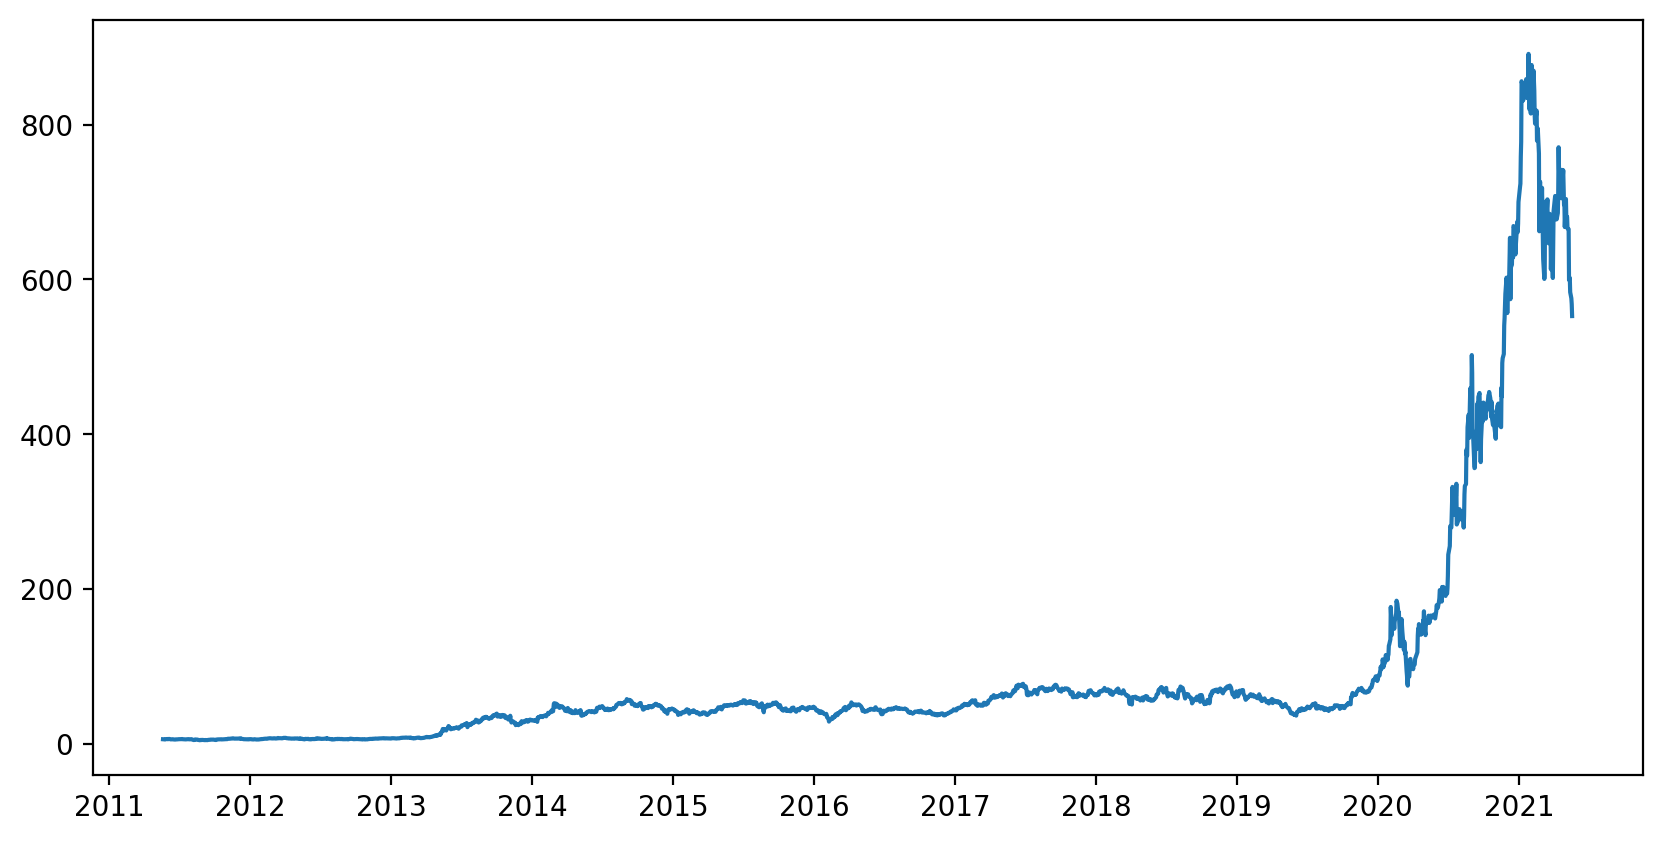

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(X_real,y_real)

In [ ]:
X_transformed = np.linspace(1,X_real.shape[0], X_real.shape[0], dtype=np.float32).reshape(X_real.shape[0],1)
y_real = y_real.reshape(y_real.shape[0],1)

In [ ]:
X_resized = np.stack([x[ :, np.newaxis] for x in X_transformed], axis=0).astype(np.float32)
y_resized = np.stack([x[ :, np.newaxis] for x in y_real], axis=0).astype(np.float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resized  ,y_resized , test_size = 0.75)

Определим функцию для вывода графиков зависимости качества от эпохи

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

def plotMetricsDependency(train_X,train_Y,model, 
                          callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=0)):
  history=model.fit(train_X,train_Y,epochs=300,batch_size=50,callbacks=callback,
                    validation_split = 0.1,verbose=1)
  num_epochs = np.arange(0, len(history.history['mse']))
  plt.figure(dpi=200)

  plt.plot(num_epochs, history.history['val_mse'], label='val_loss', c='green')
  plt.plot(num_epochs, history.history['mse'], label='train_loss', c='red')
  plt.title('Training Loss ')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

Приступим к созданию стандартной реккурентной модели

In [ ]:

input_dim = 1
units = 64
output_size = 1  

def build_model_rnn():
  
  rnn_layer = tf.keras.layers.RNN(
        tf.keras.layers.SimpleRNNCell(units),
        input_shape=(None, input_dim))
  model = tf.keras.models.Sequential([
      rnn_layer,
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(output_size)]
  )

  model.compile(
    optimizer = 'adam',
    loss= 'mse',
    metrics = ['mse']
)
  return model

In [ ]:
rnn_model= build_model_rnn()
plotMetricsDependency(X_train, y_train, rnn_model)

In [ ]:
y_pred = rnn_model.predict(X_resized)

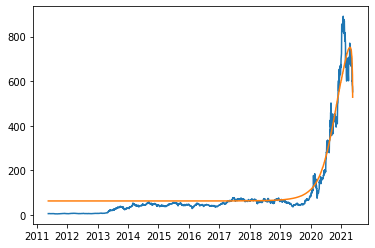

In [ ]:
plt.plot(X_real, y_real )
plt.plot(X_real, y_pred )

Теперь создадим модель LSTM

In [ ]:
def build_model_lstm():

  lstm_layer = tf.keras.layers.LSTM(
        units,
        input_shape=(None, input_dim))
  model = tf.keras.models.Sequential([
      lstm_layer,
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(output_size)]
  )
  model.compile(
    optimizer = 'adam',
    loss= 'mse',
    metrics = ['mse']
  )
  return model

In [ ]:
lstm_model= build_model_lstm()
plotMetricsDependency(X_train, y_train, lstm_model)

In [ ]:
y_pred = lstm_model.predict(X_resized)

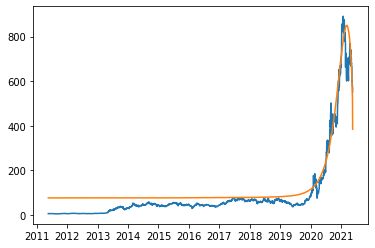

In [ ]:
plt.plot(X_real, y_real )
plt.plot(X_real, y_pred )

Теперь поработаем с GRU моделью

In [ ]:
def build_model_gru():

  gru_layer = tf.keras.layers.GRU(
        units,
        input_shape=(None, input_dim))
  model = tf.keras.models.Sequential([
      gru_layer,
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(output_size)]
  )
  model.compile(
    optimizer = 'adam',
    loss= 'mse',
    metrics = ['mse']
  )
  return model

In [ ]:
gru_model= build_model_gru()
plotMetricsDependency(X_train, y_train, gru_model)

In [ ]:
y_pred = gru_model.predict(X_resized)

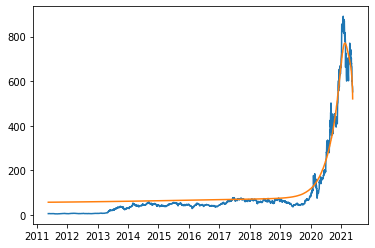

In [ ]:
plt.plot(X_real, y_real )
plt.plot(X_real, y_pred )

На данный момент последняя модель по метрикам качества самая лучшая. Попробуем теперь обучить глубокую сеть

In [ ]:
def build_model_gru_deep():

 
  model = tf.keras.models.Sequential(
      [
                                      
      tf.keras.layers.GRU(
        units,
        input_shape=(None, input_dim),
        return_sequences = True),
       
      tf.keras.layers.GRU(
        units,
        return_sequences = True
        ),
       
      tf.keras.layers.GRU(
        units,
        return_sequences = True
        ),
       
      tf.keras.layers.GRU(
        units
        ),
       
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(output_size)]
  )
  model.compile(
    optimizer = 'adam',
    loss= 'mse',
    metrics = ['mse']
  )
  return model

In [ ]:
gru_model_deep= build_model_gru_deep()
plotMetricsDependency(X_train, y_train, gru_model_deep)

In [ ]:
y_pred = gru_model_deep.predict(X_resized)

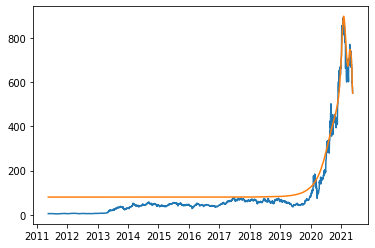

In [ ]:
plt.plot(X_real, y_real )
plt.plot(X_real, y_pred )

In [ ]:
def build_model_lstm_deep():

 
  model = tf.keras.models.Sequential(
      [
                                      
      tf.keras.layers.LSTM(
        units,
        input_shape=(None, input_dim),
        return_sequences = True),
       
      tf.keras.layers.LSTM(
        units,
        return_sequences = True
        ),
       
      tf.keras.layers.LSTM(
        units,
        return_sequences = True
        ),
       
      tf.keras.layers.LSTM(
        units
        ),
       
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(output_size)]
  )
  model.compile(
    optimizer = 'adam',
    loss= 'mse',
    metrics = ['mse']
  )
  return model

In [ ]:
lstm_model_deep= build_model_lstm_deep()
plotMetricsDependency(X_train, y_train, lstm_model_deep)

In [ ]:
y_pred = lstm_model_deep.predict(X_resized)

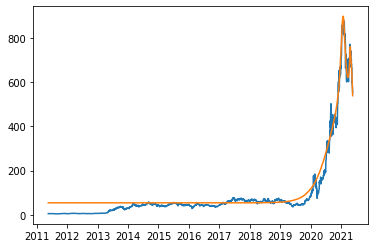

In [ ]:
plt.plot(X_real, y_real )
plt.plot(X_real, y_pred )

Глубокая модель LSTM показала себя луше, потому будем улучшать ее, добавив дропаут между слоями

In [ ]:
def build_model_lstm_deep_dropout():

 
  model = tf.keras.models.Sequential(
      [
                                      
      tf.keras.layers.LSTM(
        units,
        input_shape=(None, input_dim),
        return_sequences = True),
       
      tf.keras.layers.Dropout(0.2),
       
      tf.keras.layers.LSTM(
        units,
        return_sequences = True
        ),
       
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(
        units,
        return_sequences = True
        ),
       
      tf.keras.layers.Dropout(0.2),
       
      tf.keras.layers.LSTM(
        units
        ),
       
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(output_size)]
  )
  model.compile(
    optimizer = 'adam',
    loss= 'mse',
    metrics = ['mse']
  )
  return model

In [ ]:
lstm_model_deep_dropout= build_model_lstm_deep_dropout()
plotMetricsDependency(X_train, y_train, lstm_model_deep_dropout)

In [ ]:
y_pred = lstm_model_deep_dropout.predict(X_resized)

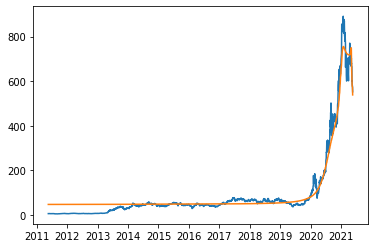

In [ ]:
plt.plot(X_real, y_real )
plt.plot(X_real, y_pred )

Построим теперь сверточную моделью. Разделим наш ряд на несколько подрядов

In [ ]:
print(X_transformed.shape)

(2516, 1)


In [ ]:
X_conv = np.split(X_transformed, 68)
y_conv = np.split(y_real, 68)

In [ ]:
X_conv = np.asarray(X_conv).reshape(68,1,-1)
y_conv = np.asarray(y_conv).reshape(68,-1)

In [ ]:
print(X_conv.shape)

(68, 1, 37)


In [ ]:
def build_model_conv():
  model = tf.keras.Sequential(
      [
      tf.keras.layers.Conv1D(
          input_shape = (1,37),
          filters = 64,
          kernel_size = 4,
          padding = 'same',
          strides = 2,
          activation = 'elu'
      ),

      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.MaxPool1D(pool_size=4, padding = 'same'),

      tf.keras.layers.Conv1D(
          filters = 64,
          kernel_size = 4,
          padding = 'same',
          strides = 2,
          activation = 'elu'
      ),
      
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(37, activation = 'elu')
      ]
  )
  model.compile(
    optimizer = 'adam',
    loss= 'mse',
    metrics = ['mse']
  )
  return model

In [ ]:
X_train_conv, X_test_conv, y_train_conv,y_test_conv = train_test_split(X_conv, y_conv, test_size =0.1 )

In [ ]:
conv_model= build_model_conv()
plotMetricsDependency(X_train_conv, y_train_conv, conv_model)

In [ ]:
y_pred = conv_model.predict(X_conv)

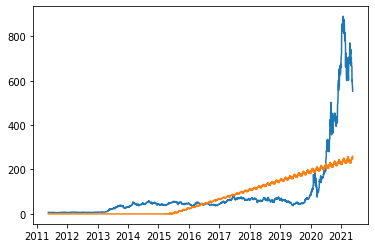

In [ ]:
plt.plot(X_real, y_real )
plt.plot(X_real, y_pred.reshape(-1,1) )

(**)Проверим гипотезу о наличии автокорреляции. Для этого применим процедуру Кохрейна-Оркатта при предположении, что имеется модель авторегрессии первого порядка(но там скорее всего получится бред, ибо порождающий процесс почти наверняка не стационарный и там автокорреляция более высокого порядка)

In [ ]:
from numpy import linalg as lg

In [ ]:
max_X = max(X_lsq)
max_y = max(y_lsq)

In [ ]:
X_lsq = np.asarray(X_transformed, dtype = np.float).reshape(-1,1)  /max_X
y_lsq = np.asarray(y_real, dtype = np.float).reshape(-1,1) / max_y

In [ ]:
def get_leasts_ols(x, y_true, w):
  b = np.mean(y_true) - w * np.mean(x)
  y_pred = (x.dot(w) + b).reshape(-1,1)
  return np.asarray(y_true - y_pred)

In [ ]:
def get_coefs_ols(x, y_true):
  a = (x.transpose()).dot(x)
  b = (x.transpose()).dot(y_true)
  c = lg.inv(a)
  w = c.dot(b)
  return(w)

In [ ]:
def get_local_ro_estim(leasts):
  y_leasts = leasts[1:leasts.shape[0]]
  x_leasts = leasts[0:leasts.shape[0]-1]
  return get_coefs_ols(x_leasts, y_leasts)


In [ ]:
def update_x(ro, x):
  

  x_new = np.zeros(x.shape[0])
  x_new[0]= x[0] * (1- ro**2)**0.5
  
  for i in range(1,x.shape[0]):
    x_new[i]= x[i] - ro * x[i-1]
  
  return x_new
  

In [ ]:
def update_y(ro, y):
  
  y_new = np.zeros(y.shape[0])
  y_new[0]= y[0] * (1- ro**2)**0.5
  
  for i in range(1,y.shape[0]):
    y_new[i]= y[i] - ro * y[i-1]
  
  return y_new

In [ ]:
def get_final_ro(x, y_true):
  
  w = get_coefs_ols(x, y_true)
  leasts = get_leasts_ols(x,y_true,w)
  ro_curr = get_local_ro_estim(leasts)
  x = update_x(ro_curr,x).reshape(-1,1)
  y = update_y(ro_curr, y_true).reshape(-1,1)
  w = get_coefs_ols(x, y)
  leasts = get_leasts_ols(x,y,w)
  ro_next = get_local_ro_estim(leasts)
  while (abs((ro_next - ro_curr).all())> 0.01):
    ro_curr = ro_next
    x = update_x(ro_curr,x).reshape(-1,1)
    y = update_y(ro_curr, y).reshape(-1,1)
    w  = get_coefs_ols(x, y)
    leasts = get_leasts_ols(x,y,w)
    ro_next = get_local_ro_estim(leasts)
  return ro_next


In [ ]:
ro = get_final_ro(X_lsq,y_lsq)
print(ro)

[[-1.0289493e-17]]
